In [7]:
#导入所需模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [8]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

In [9]:
#将features（数字图像特征值）使用reshape转换
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [10]:
#将features（数字图像特征值）标准化
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [11]:
#label（数字真是的值）以one-Hot Encoding进行转换
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [12]:
#多层感知加入DropOut功能以避免过度拟合
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = 'normal',
               activation = 'relu'))

In [15]:
#加入Dropout功能
model.add(Dropout(0.5))

In [16]:
model.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [17]:
#查看摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#开始训练
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',metrics = ['accuracy'])
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot,validation_split = 0.2,
                         epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3576 - acc: 0.8934 - val_loss: 0.1620 - val_acc: 0.9552
Epoch 2/10
 - 6s - loss: 0.1603 - acc: 0.9529 - val_loss: 0.1166 - val_acc: 0.9659
Epoch 3/10
 - 6s - loss: 0.1165 - acc: 0.9651 - val_loss: 0.0995 - val_acc: 0.9706
Epoch 4/10
 - 6s - loss: 0.0928 - acc: 0.9725 - val_loss: 0.0913 - val_acc: 0.9728
Epoch 5/10
 - 6s - loss: 0.0757 - acc: 0.9774 - val_loss: 0.0822 - val_acc: 0.9755
Epoch 6/10
 - 6s - loss: 0.0622 - acc: 0.9805 - val_loss: 0.0764 - val_acc: 0.9770
Epoch 7/10
 - 6s - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0777 - val_acc: 0.9774
Epoch 8/10
 - 6s - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0732 - val_acc: 0.9788
Epoch 9/10
 - 6s - loss: 0.0435 - acc: 0.9861 - val_loss: 0.0690 - val_acc: 0.9788
Epoch 10/10
 - 6s - loss: 0.0374 - acc: 0.9887 - val_loss: 0.0674 - val_acc: 0.9804


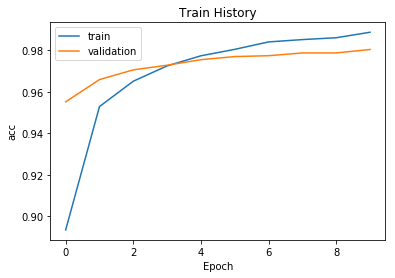

In [20]:
#画出准确率执行结果
#建立showt_rain_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

In [21]:
#查看预测准确率
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy = ',scores[1])

10000/10000 [==============================] - 1s 68us/step

accuracy =  0.9808
